In [1]:
import sys
from collections import defaultdict

import pandas as pd

% matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
# sys.path.append('/home/lukasz/github/nlp/nlp-architect/examples/aspect_extraction/')
# from aspect_extraction_test import get_aspect_datasets 

In [13]:
# sys.path.append('/home/lukasz/github/nlp/nlp-architect/')
# from nlp_architect.data.sequential_tagging import SequentialTaggingDataset

In [5]:
sys.path.append('/home/laugustyniak//github/phd/sentiment-backend/')
from aspects.preprocessing.conll import Conll, get_tag_frequency, process_conll_file
from aspects.analysis import metrics

ImportError: cannot import name 'get_tag_frequency'

# Get datasets

In [6]:
datasets = get_aspect_datasets()

NameError: name 'get_aspect_datasets' is not defined

In [79]:
datasets_stats = defaultdict(dict)

min_tag_freq = 1
for dataset in datasets: 
    df_tag_freq_train = process_conll_file(dataset.train_file.as_posix())
    df_tag_freq_test = process_conll_file(dataset.test_file.as_posix())
    
    aspects_train = df_tag_freq_train.text.tolist()
    aspects_test = df_tag_freq_test.text.tolist()
    
    aspects_all_unique = set(aspects_train).union(set(aspects_test))
    n_aspects_total = len(aspects_all_unique)
    
#     datasets_stats[dataset.name]['jaccard'] = metrics.jaccard(aspects_train, aspects_test)
#     datasets_stats[dataset.name]['unique_aspects'] = n_aspects_total
#     datasets_stats[dataset.name]['intersecting_aspects'] = len(set(aspects_train).intersection(set(aspects_test)))
#     datasets_stats[dataset.name]['unique_aspects_train'] = len(set(aspects_train))
#     datasets_stats[dataset.name]['unique_aspects_test'] = len(set(aspects_test))
    
#     n_unigrams = len(list(filter(lambda t: len(t.split()) == 1, aspects_all_unique)))
#     datasets_stats[dataset.name]['n_unigrams'] = n_unigrams
#     n_bi_and_more_ngrams = len(list(filter(lambda t: len(t.split()) > 1, aspects_all_unique)))
#     datasets_stats[dataset.name]['n_bi_and_more_ngrams'] = n_bi_and_more_ngrams
#     datasets_stats[dataset.name]['percent_uni_vs_ngrams'] = n_unigrams / n_bi_and_more_ngrams
    
    for idx, n in enumerate([1, 2, 3, 5, 10, 20], start=1):
        aspects_min_freq_train = df_tag_freq_train[df_tag_freq_train['count'] >= n].text.tolist()
        aspects_min_freq_test = df_tag_freq_test[df_tag_freq_test['count'] >= n].text.tolist()
        datasets_stats[dataset.name]['id_' + str(idx) + '_n_bi_and_more_ngrams_with_freq_higher_than_' + str(n)] = len(set(aspects_min_freq_train + aspects_min_freq_test))

100%|██████████| 800/800 [00:00<00:00, 107518.69it/s]


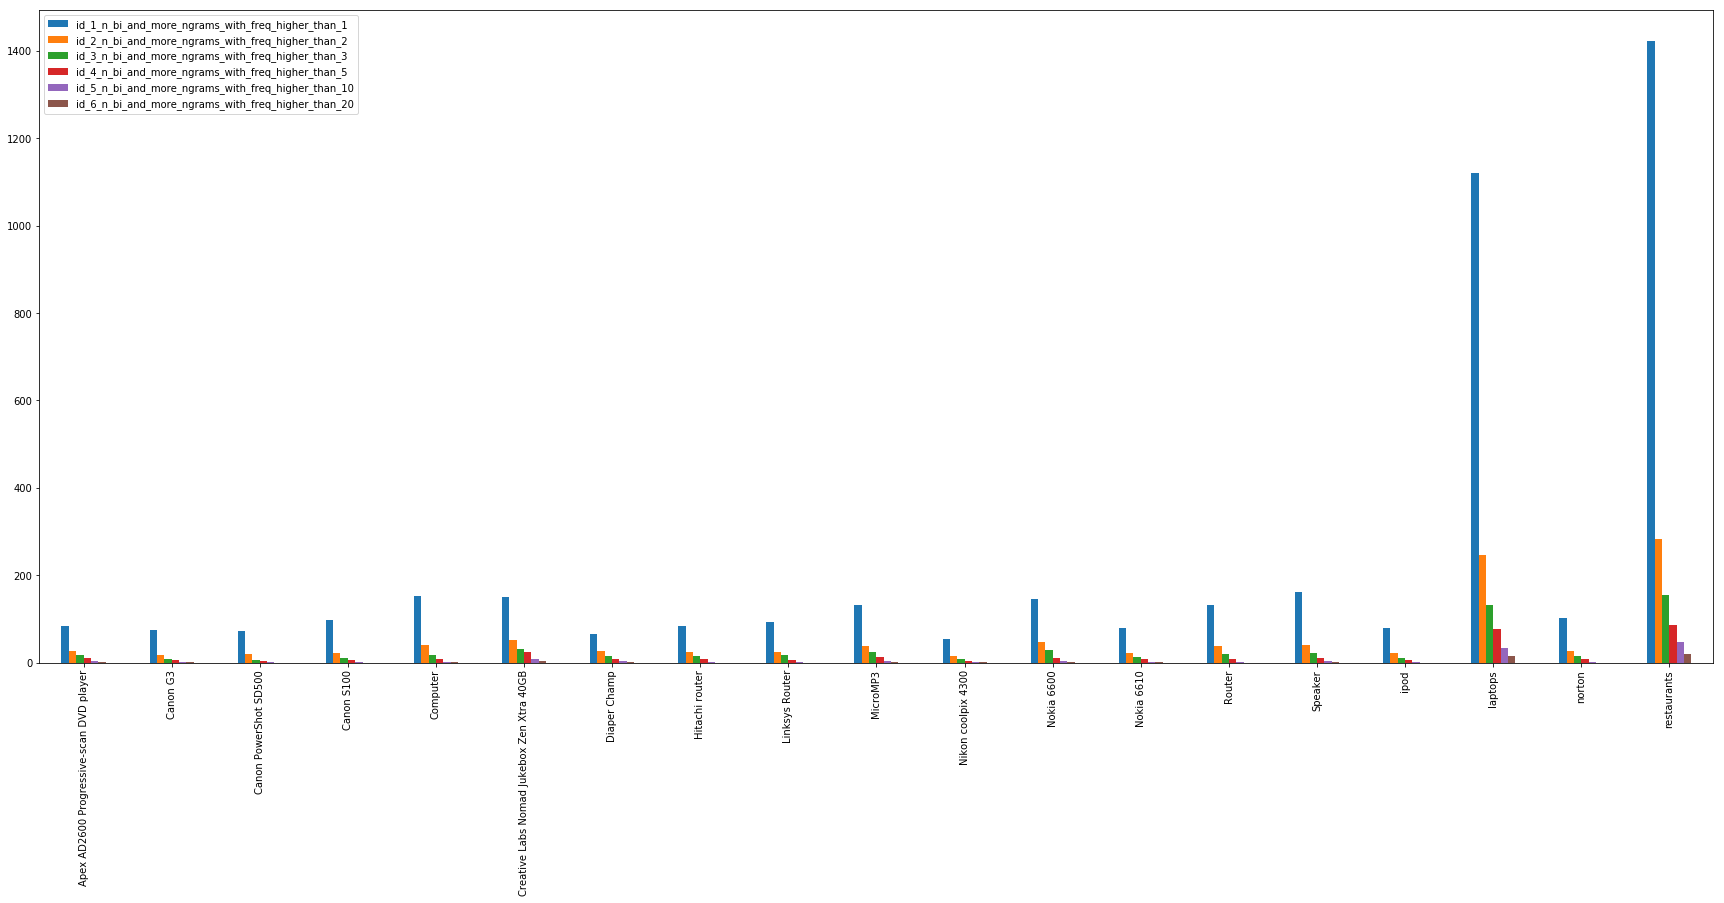

In [81]:
pd.DataFrame.from_dict(datasets_stats).T.plot(kind='bar', figsize=(30,12))

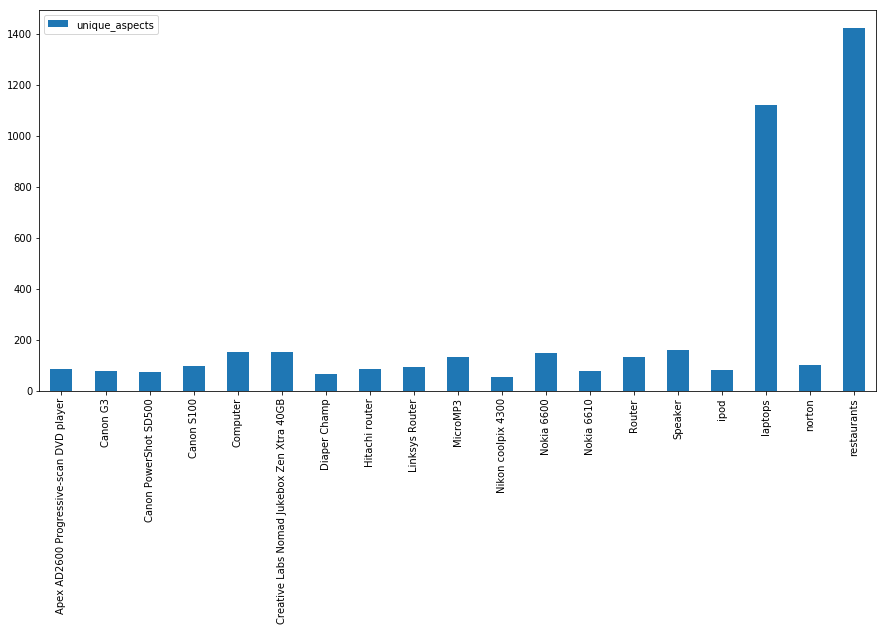

In [34]:
pd.DataFrame.from_dict(datasets_stats).T.sort_index(axis=0).plot(kind='bar', figsize=(15,7))

In [37]:
pd.DataFrame.from_dict(datasets_stats).T.sort_index(axis=1)

,jaccard
Apex AD2600 Progressive-scan DVD player,0.144578
Canon G3,0.213333
Canon PowerShot SD500,0.097222
Canon S100,0.122449
Computer,0.156863
Creative Labs Nomad Jukebox Zen Xtra 40GB,0.246667
Diaper Champ,0.272727
Hitachi router,0.190476
Linksys Router,0.215054
MicroMP3,0.166667
